In [11]:
!pip install numpy
!pip install pandas
!pip install statsmodels
!pip install matplotlib
!pip install r2_score
!pip install scikit-learn
!pip install matplotlib
!pip install openpyxl


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement r2_score (from versions: none)
ERROR: No matching distribution found for r2_score
You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

C:\Users\haydencordeiro\AppData\Local\Temp\ipykernel_7364\748826985.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [27]:
df = pd.read_excel("./data/population_ghi_unemploment_yearwise_import export_africa_sheet.xlsx")
# df = df.drop(columns=['Countries'])



In [28]:
# df['Year'] = pd.to_datetime(df['Year'], format='%Y')
# 

In [29]:
desired_columns = ['Year', 'Population', 'GHI']
total_value_by_year = df[desired_columns]
total_value_by_year = total_value_by_year.dropna()


In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Fit exponential smoothing model
model = ExponentialSmoothing(total_value_by_year['GHI'], seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit()

# Forecast 5 years into the future
forecast = model_fit.forecast(5)

print("Forecasted values for the next 5 years:")
print(forecast)

Forecasted values for the next 5 years:
31    25.455899
32    24.632691
33    25.212637
34    24.914002
35    24.598095
dtype: float64


In [33]:
model_fit.params

{'smoothing_level': 0.9505235695394175,
 'smoothing_trend': 0.9505235695394175,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 42.77475367220326,
 'initial_trend': -0.502082250344306,
 'initial_seasons': array([-0.11328749, -0.02611075,  0.02003862,  0.11375327,  0.16654729,
         0.33405598,  0.49673172,  0.63935398, -0.09633447,  0.57113166,
         0.36001759,  0.13163014]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

TypeError: 'numpy.float64' object cannot be interpreted as an integer

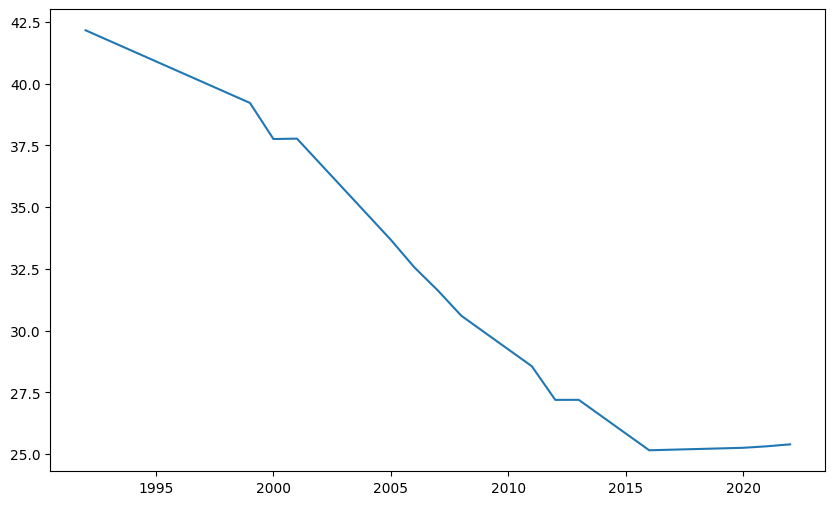

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(total_value_by_year['Year'], total_value_by_year['GHI'], label='Actual')
plt.plot(range(total_value_by_year['Year'].max() + 1, total_value_by_year['GHI'].max() + 6), forecast, label='Forecast')
plt.title('Actual vs Forecasted Total Value for Africa')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
residuals = total_value_by_year['Value'] - model_fit.fittedvalues


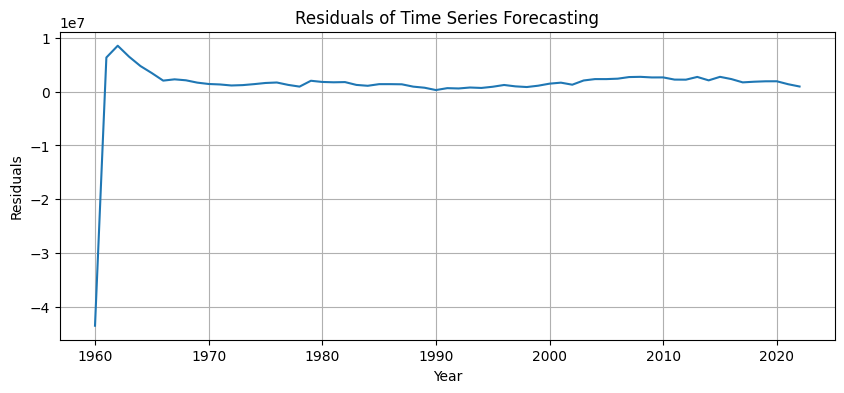

In [102]:
plt.figure(figsize=(10, 4))
plt.plot(total_value_by_year['Year'], residuals)
plt.title('Residuals of Time Series Forecasting')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [104]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(total_value_by_year['Value'], model_fit.fittedvalues)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.6305193259126907


In [106]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(total_value_by_year['Value'], model_fit.fittedvalues)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 35549403336817.72


In [107]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 5962332.03845758


In [111]:
total_value_by_year

,Year,Value
0,1960,277118493
1,1961,283779876
2,1962,290712155
3,1963,297898741
4,1964,305365652
...,...,...
58,2018,1252369090
59,2019,1283595475
60,2020,1315356983
61,2021,1347125535


In [16]:
# Actual values
actual_values = total_value_by_year['GHI']  # Assuming you have actual values available

# Forecasted values
forecasted_values = model_fit.fittedvalues  # Assuming you have fitted values

In [17]:
forecasted_values

32    42.151797
33    41.772106
34    41.206316
35    40.956987
36    40.441629
37    40.196994
38    39.660004
39    39.192969
40    37.909794
41    37.741422
42    36.887940
43    35.746264
44    34.680107
45    34.054432
46    32.631921
47    31.525372
48    30.596377
49    29.740277
50    29.176624
51    28.542765
52    27.002671
53    27.188680
54    26.337255
55    25.774112
56    25.144720
61    24.866047
dtype: float64

In [18]:
actual_values

32    42.161111
33    41.740972
34    41.320833
35    40.900694
36    40.480556
37    40.060417
38    39.640278
39    39.220139
40    37.759459
41    37.775694
42    36.751389
43    35.727083
44    34.702778
45    33.678472
46    32.565541
47    31.629861
48    30.605556
49    29.925000
50    29.244444
51    28.563889
52    27.201316
53    27.202778
54    26.522222
55    25.841667
56    25.161111
61    25.321429
Name: GHI, dtype: float64

In [23]:
forecast_0th_year = model_fit.predict(start=-3
)


In [20]:
forecast_0th_year


61    24.866047
dtype: float64